# Data Description

## Problem Statement :

- The aim of the project is to classify the road side signs category using CNN (with different architectures).


## About Dataset:
- The dataset contains 80,000 synthetic images of road signs.
- Each image has a *.png format and a size of 224 x 224 pixels.
- There are 8 classes in the data that correspond to the categories of signs in Russia. For the test 3000 images per category.
- For train 7000 images per category.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import random
import os
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from keras.layers import Conv2D, Dense, Flatten, Rescaling, AveragePooling2D, Dropout
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

2023-01-18 16:35:41.202579: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Import data path
data_dir = '/Users/jagritarora/Desktop/CNN/archive'
train_path = '/Users/jagritarora/Desktop/CNN/archive/train'
test_path = '/Users/jagritarora/Desktop/CNN/archive/test'

In [3]:
#Initialize height and weight
height = 50
width = 50

In [4]:
# Initialize seeds and batch size
batch_size = 150
seed = 42

In [5]:
# Image rescaling 
train_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2)
train_dataset = train_datagen.flow_from_directory(train_path,
                                                  target_size=(height, width),
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=True,
                                                  seed=seed,
                                                  color_mode='rgb',
                                                  interpolation='hamming',
                                                  subset='training')

test_datagen = ImageDataGenerator(rescale=1./255,
                                  validation_split=0.2)
test_dataset = test_datagen.flow_from_directory(train_path,
                                                target_size=(height, width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True,
                                                seed=seed,
                                                color_mode='rgb',
                                                interpolation='hamming',
                                                subset='validation')

Found 44800 images belonging to 8 classes.
Found 11200 images belonging to 8 classes.


- Found 44800 images belonging to 8 classes.
- Found 11200 images belonging to 8 classes.

**We have 8 classes in training dataset in which 44800 images are there and 8 classes in testing dataset in which 11200 images are there**

## Basic CNN Model

In [6]:
model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=16, kernel_size=(5,5), activation='relu', input_shape=(height,width,3)),
    keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.Dropout(rate=0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.25),
    
    keras.layers.Dense(8, activation='softmax')
])

2023-01-18 16:36:08.207184: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
alpha=0.01
epochs=15
optim = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [8]:
cnn = model.fit(train_dataset,
                steps_per_epoch = len(train_dataset),
                epochs = epochs,
                validation_data = test_dataset,
                validation_steps = len(test_dataset))

Epoch 1/15
299/299 [==============================] - 607s 2s/step - loss: 0.3368 - accuracy: 0.8945 - val_loss: 0.1801 - val_accuracy: 0.9395
Epoch 2/15
299/299 [==============================] - 595s 2s/step - loss: 0.0872 - accuracy: 0.9707 - val_loss: 0.0738 - val_accuracy: 0.9759
Epoch 3/15
299/299 [==============================] - 559s 2s/step - loss: 0.0543 - accuracy: 0.9817 - val_loss: 0.0978 - val_accuracy: 0.9697
Epoch 4/15
299/299 [==============================] - 609s 2s/step - loss: 0.0386 - accuracy: 0.9872 - val_loss: 0.0671 - val_accuracy: 0.9824
Epoch 5/15
299/299 [==============================] - 591s 2s/step - loss: 0.0343 - accuracy: 0.9884 - val_loss: 0.1441 - val_accuracy: 0.9688
Epoch 6/15
299/299 [==============================] - 448s 1s/step - loss: 0.0210 - accuracy: 0.9931 - val_loss: 1.0049 - val_accuracy: 0.8430
Epoch 7/15
299/299 [==============================] - 451s 2s/step - loss: 0.0263 - accuracy: 0.9917 - val_loss: 0.2943 - val_accuracy: 0.9450

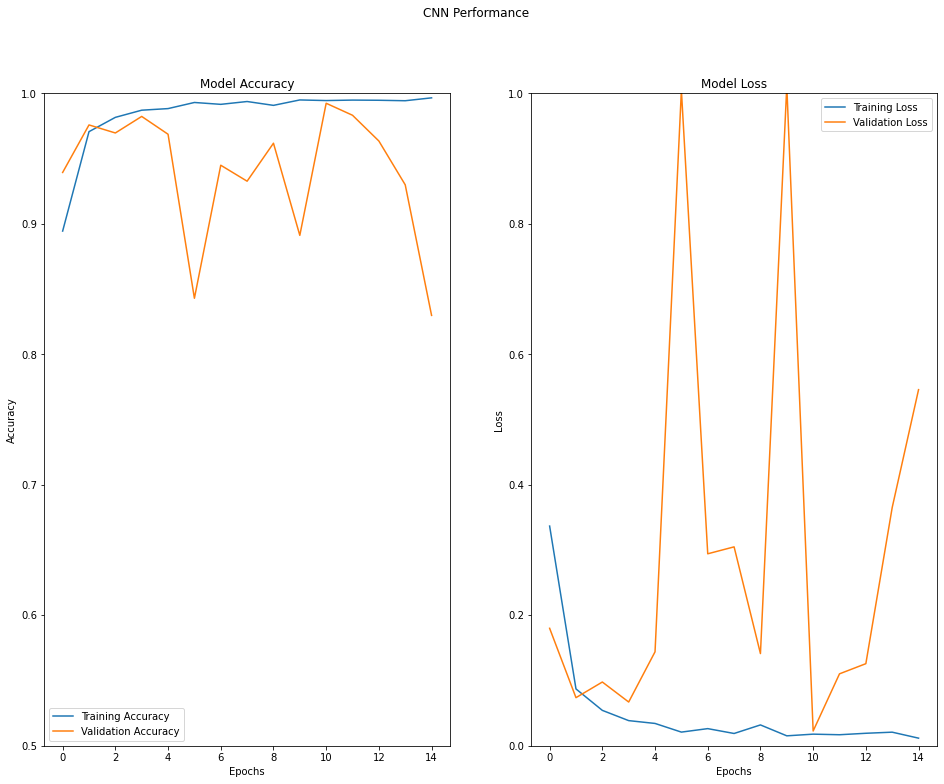

<Figure size 720x504 with 0 Axes>

In [9]:
# Graphical representation of Model accuracy and loss
fig,ax=plt.subplots(1,2)
fig.set_size_inches(16,12)
performance = pd.DataFrame(cnn.history)
plt.figure(figsize=(10,7))
ax[1].plot(performance[['loss','val_loss']])
ax[1].legend(['Training Loss', 'Validation Loss'])
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_ylim(0,1)
ax[0].plot(performance[['accuracy','val_accuracy']])
ax[0].legend(['Training Accuracy', 'Validation Accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0.5,1)
fig.suptitle('CNN Performance')
plt.show()

## LeNet_5 Model

In [10]:
LeNet_5 = Sequential() 
LeNet_5.add(Conv2D(filters=16, kernel_size=(5,5),  input_shape=(height,width,3))),
LeNet_5.add(BatchNormalization())
LeNet_5.add(Activation('relu'))  
LeNet_5.add(AveragePooling2D())
LeNet_5.add(Conv2D(filters=32, kernel_size=(5,5)))
LeNet_5.add(BatchNormalization())
LeNet_5.add(Activation('relu')) 
LeNet_5.add(AveragePooling2D())
LeNet_5.add(Flatten())
LeNet_5.add(Dense(units = 512))
LeNet_5.add(BatchNormalization())
LeNet_5.add(Activation('relu')) 
LeNet_5.add(Dense(units = 120))
LeNet_5.add(BatchNormalization())
LeNet_5.add(Activation('relu')) 
LeNet_5.add(Dense(units = 8))
LeNet_5.add(BatchNormalization())
LeNet_5.add(Activation('softmax')) 

- https://analyticsindiamag.com/complete-tutorial-on-lenet-5-guide-to-begin-with-cnns/

In [11]:
alpha=0.01
epochs=15
optim = keras.optimizers.Adam(learning_rate=0.01)
LeNet_5.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [12]:
cnn2 = LeNet_5.fit(train_dataset,
                steps_per_epoch = len(train_dataset),
                epochs = epochs,
                validation_data = test_dataset,
                validation_steps = len(test_dataset))

Epoch 1/15
299/299 [==============================] - 363s 1s/step - loss: 0.2122 - accuracy: 0.9512 - val_loss: 0.1978 - val_accuracy: 0.9443
Epoch 2/15
299/299 [==============================] - 424s 1s/step - loss: 0.0419 - accuracy: 0.9902 - val_loss: 0.1126 - val_accuracy: 0.9646
Epoch 3/15
299/299 [==============================] - 362s 1s/step - loss: 0.0245 - accuracy: 0.9937 - val_loss: 0.1564 - val_accuracy: 0.9554
Epoch 4/15
299/299 [==============================] - 329s 1s/step - loss: 0.0145 - accuracy: 0.9964 - val_loss: 0.1551 - val_accuracy: 0.9602
Epoch 5/15
299/299 [==============================] - 329s 1s/step - loss: 0.0134 - accuracy: 0.9967 - val_loss: 0.2213 - val_accuracy: 0.9319
Epoch 6/15
299/299 [==============================] - 327s 1s/step - loss: 0.0107 - accuracy: 0.9970 - val_loss: 0.0144 - val_accuracy: 0.9961
Epoch 7/15
299/299 [==============================] - 322s 1s/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0090 - val_accuracy: 0.9972

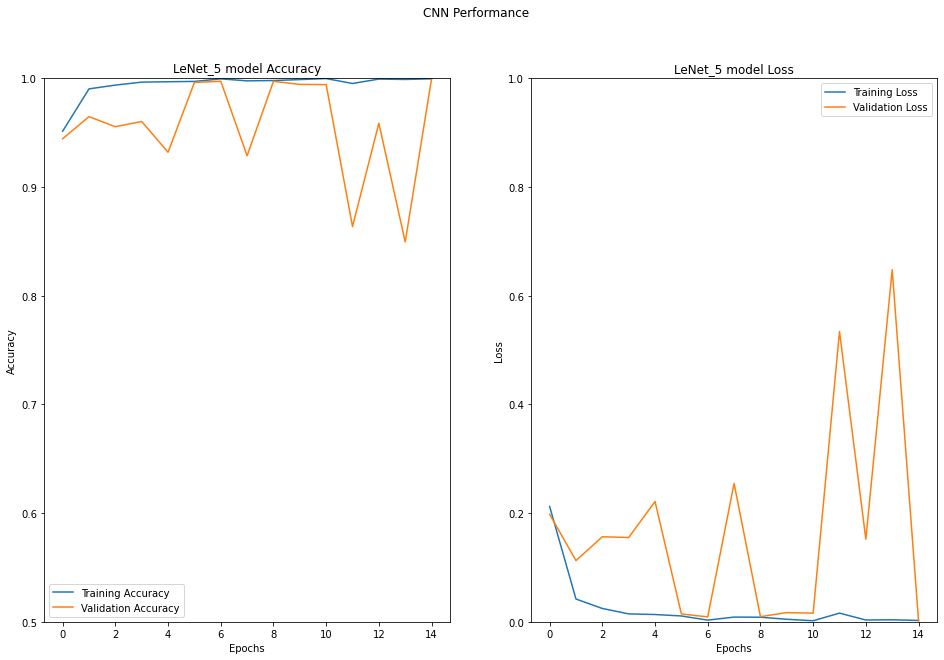

<Figure size 720x504 with 0 Axes>

In [13]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(16,10)
performance = pd.DataFrame(cnn2.history)
plt.figure(figsize=(10,7))
ax[1].plot(performance[['loss','val_loss']])
ax[1].legend(['Training Loss', 'Validation Loss'])
ax[1].set_title('LeNet_5 model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_ylim(0,1)
ax[0].plot(performance[['accuracy','val_accuracy']])
ax[0].legend(['Training Accuracy', 'Validation Accuracy'])
ax[0].set_title('LeNet_5 model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0.5,1)
fig.suptitle('CNN Performance')
plt.show()

## AlexNet Model

In [14]:
AlexNet = Sequential()
AlexNet.add(Conv2D(filters=16, input_shape=(50,50,3), kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
AlexNet.add(Conv2D(filters=32, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
AlexNet.add(Conv2D(filters=48, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

AlexNet.add(Flatten())

AlexNet.add(Dense(4096, input_shape=(32,32,3,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

AlexNet.add(Dropout(0.4))


AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

AlexNet.add(Dropout(0.4))


AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

AlexNet.add(Dropout(0.4))


AlexNet.add(Dense(8))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

- https://www.mygreatlearning.com/blog/alexnet-the-first-cnn-to-win-image-net/

In [15]:
alpha=0.01
epochs=15
optim = keras.optimizers.Adam(learning_rate=0.01)
AlexNet.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [16]:
cnn3 = AlexNet.fit(train_dataset,
                steps_per_epoch = len(train_dataset),
                epochs = epochs,
                validation_data = test_dataset,
                validation_steps = len(test_dataset))

Epoch 1/15
299/299 [==============================] - 403s 1s/step - loss: 0.3988 - accuracy: 0.8781 - val_loss: 0.2845 - val_accuracy: 0.9205
Epoch 2/15
299/299 [==============================] - 398s 1s/step - loss: 0.1070 - accuracy: 0.9672 - val_loss: 0.2983 - val_accuracy: 0.9052
Epoch 3/15
299/299 [==============================] - 363s 1s/step - loss: 0.0619 - accuracy: 0.9811 - val_loss: 0.1748 - val_accuracy: 0.9504
Epoch 4/15
299/299 [==============================] - 627s 2s/step - loss: 0.0433 - accuracy: 0.9866 - val_loss: 0.0889 - val_accuracy: 0.9739
Epoch 5/15
299/299 [==============================] - 803s 3s/step - loss: 0.0325 - accuracy: 0.9908 - val_loss: 0.0974 - val_accuracy: 0.9745
Epoch 6/15
299/299 [==============================] - 1075s 4s/step - loss: 0.0215 - accuracy: 0.9935 - val_loss: 0.3363 - val_accuracy: 0.8963
Epoch 7/15
299/299 [==============================] - 1047s 3s/step - loss: 0.0235 - accuracy: 0.9928 - val_loss: 0.5936 - val_accuracy: 0.85

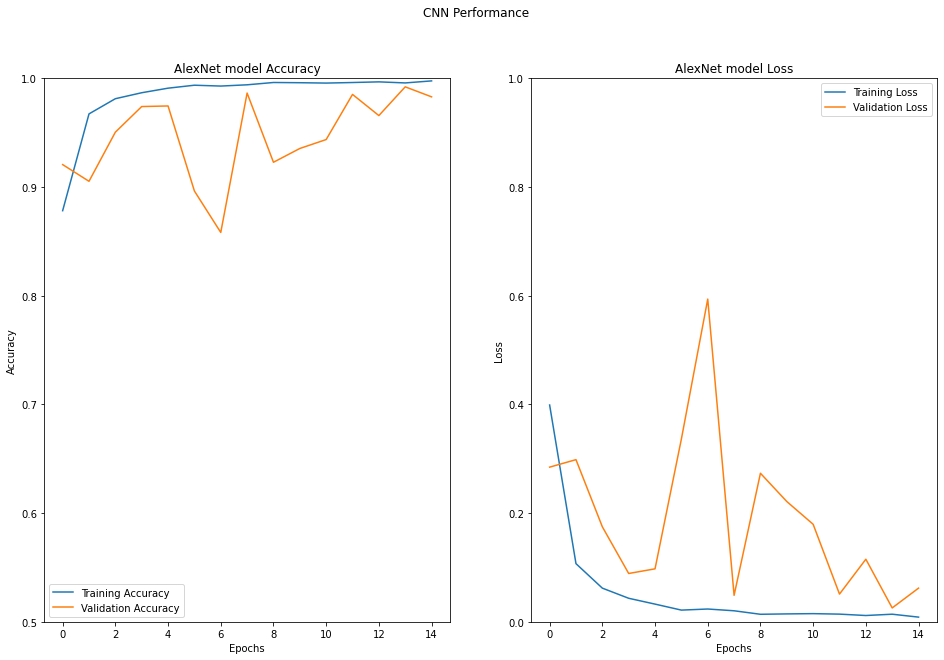

<Figure size 720x504 with 0 Axes>

In [17]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(16,10)
performance = pd.DataFrame(cnn3.history)
plt.figure(figsize=(10,7))
ax[1].plot(performance[['loss','val_loss']])
ax[1].legend(['Training Loss', 'Validation Loss'])
ax[1].set_title('AlexNet model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_ylim(0,1)
ax[0].plot(performance[['accuracy','val_accuracy']])
ax[0].legend(['Training Accuracy', 'Validation Accuracy'])
ax[0].set_title('AlexNet model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0.5,1)
fig.suptitle('CNN Performance')
plt.show()

## VGG Model

In [18]:
vgg = Sequential()
vgg.add(Conv2D(input_shape=(50,50,3),filters=16,kernel_size=(5,5),padding="same"))
vgg.add(Conv2D(filters=32,kernel_size=(5,5),padding="same", activation="relu"))
vgg.add(BatchNormalization())
vgg.add(Activation('relu'))
vgg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
vgg.add(Conv2D(filters=32, kernel_size=(5,5), padding="same"))
vgg.add(BatchNormalization())
vgg.add(Activation('relu'))
vgg.add(Conv2D(filters=32, kernel_size=(5,5), padding="same"))
vgg.add(BatchNormalization())
vgg.add(Activation('relu'))
vgg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
vgg.add(Conv2D(filters=48, kernel_size=(5,5), padding="same"))
vgg.add(BatchNormalization())
vgg.add(Activation('relu'))
vgg.add(Conv2D(filters=48, kernel_size=(5,5), padding="same", activation="relu"))
vgg.add(Conv2D(filters=48, kernel_size=(3,3), padding="same", activation="relu"))
vgg.add(BatchNormalization())
vgg.add(Activation('relu'))
vgg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
vgg.add(Conv2D(filters=64, kernel_size=(5,5), padding="same"))
vgg.add(Conv2D(filters=64, kernel_size=(5,5), padding="same"))
vgg.add(BatchNormalization())
vgg.add(Activation('relu'))
vgg.add(Conv2D(filters=64, kernel_size=(5,5), padding="same"))
vgg.add(BatchNormalization())
vgg.add(Activation('relu'))
vgg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
vgg.add(Conv2D(filters=80, kernel_size=(5,5), padding="same", activation="relu"))
vgg.add(Conv2D(filters=80, kernel_size=(5,5), padding="same", activation="relu"))
vgg.add(BatchNormalization())
vgg.add(Activation('relu'))               
vgg.add(Conv2D(filters=80, kernel_size=(5,5), padding="same"))
vgg.add(BatchNormalization())
vgg.add(Activation('relu'))
vgg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
vgg.add(Flatten())
vgg.add(Dense(units=4096))
vgg.add(BatchNormalization())
vgg.add(Activation('relu'))               
vgg.add(Dense(units=1700,activation="relu"))
vgg.add(BatchNormalization())
vgg.add(Activation('relu'))               
vgg.add(Dense(units=8))
vgg.add(BatchNormalization())
vgg.add(Activation('softmax'))

- https://www.geeksforgeeks.org/vgg-16-cnn-model/ 

In [19]:
alpha=0.01
epochs=15
optim = keras.optimizers.Adam(learning_rate=0.01)
vgg.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [20]:
cnn4 = vgg.fit(train_dataset,
                steps_per_epoch = len(train_dataset),
                epochs = epochs,
                validation_data = test_dataset,
                validation_steps = len(test_dataset))

Epoch 1/15
299/299 [==============================] - 786s 3s/step - loss: 0.7037 - accuracy: 0.7498 - val_loss: 3.5204 - val_accuracy: 0.4152
Epoch 2/15
299/299 [==============================] - 867s 3s/step - loss: 0.1383 - accuracy: 0.9590 - val_loss: 0.1860 - val_accuracy: 0.9366
Epoch 3/15
299/299 [==============================] - 895s 3s/step - loss: 0.0604 - accuracy: 0.9835 - val_loss: 1.7707 - val_accuracy: 0.6346
Epoch 4/15
299/299 [==============================] - 992s 3s/step - loss: 0.0307 - accuracy: 0.9918 - val_loss: 0.1702 - val_accuracy: 0.9499
Epoch 5/15
299/299 [==============================] - 1017s 3s/step - loss: 0.0235 - accuracy: 0.9941 - val_loss: 0.9147 - val_accuracy: 0.7904
Epoch 6/15
299/299 [==============================] - 1003s 3s/step - loss: 0.0190 - accuracy: 0.9950 - val_loss: 0.1304 - val_accuracy: 0.9614
Epoch 7/15
299/299 [==============================] - 955s 3s/step - loss: 0.0173 - accuracy: 0.9954 - val_loss: 0.0516 - val_accuracy: 0.98

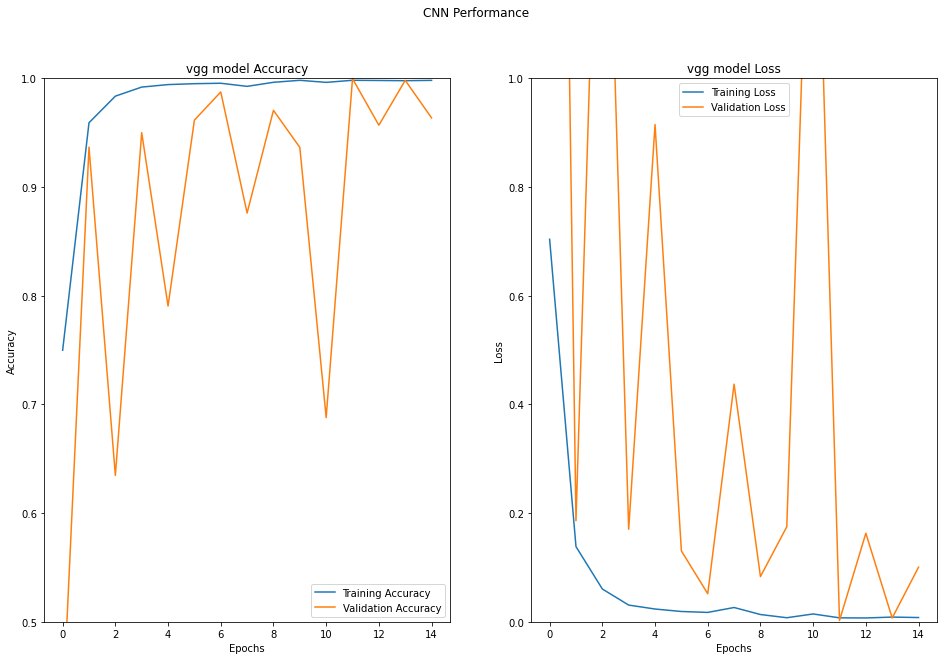

<Figure size 720x504 with 0 Axes>

In [21]:
# Graphical representation of accuracy and loss
fig,ax=plt.subplots(1,2)
fig.set_size_inches(16,10)
performance = pd.DataFrame(cnn4.history)
plt.figure(figsize=(10,7))
ax[1].plot(performance[['loss','val_loss']])
ax[1].legend(['Training Loss', 'Validation Loss'])
ax[1].set_title('vgg model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_ylim(0,1)
ax[0].plot(performance[['accuracy','val_accuracy']])
ax[0].legend(['Training Accuracy', 'Validation Accuracy'])
ax[0].set_title('vgg model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0.5,1)
fig.suptitle('CNN Performance')
plt.show()

## Prediction on single image

In [24]:
# prediction on single image
from keras.preprocessing import image
from tensorflow.keras.preprocessing import image

val_image = image.load_img('/Users/jagritarora/Desktop/CNN/Prediction_Img.png',target_size=(height, width))
val_image = image.img_to_array(val_image)
val_image = np.expand_dims(val_image,axis=0)

In [25]:
result = model.predict(val_image)
result

1/1 [==============================] - 1s 617ms/step


array([[1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [26]:
train_dataset.class_indices

{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7}

## Conclusion:

- Here we use four types of cnn architecture, among all Lenet_5 cnn architecture gives better accuracy with minimun loss.

**Note - This dataset has 8 directories for train and test and some images are present in every directory so, The prediction may be wrong sometimes.**